In [3390]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1=finesse.kat()
kat.verbose=True

In [3391]:
kat.parse("""

maxtem 3
l laser 30 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  
mod sb1 55.5556M 0.001 3 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 n31                     #space b/w mod and PRM      


##### FOR ANGULAR SENSING PRM #####
bs pickoff 0.1 0.9 0 45 n31 dump n32 refl_a
s s2 0.1 refl_a a8                       
bs bsQPD 0.5 0.5 0 45 a8 a9 a10 dump            #bs to split power between two detectors 

s sQPD1 0.1 a9 a11                   
s sQPD2 0.1 a10 a12

attr s2 g 45                                 #guoy phase for det1
attr sQPD1 g 40                                 #guoy phase for det1
attr sQPD2 g 130                                #guoy phase for det2

pd1 QPDrefl1 166.6668M 90 a11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 166.6668M 90 a12                       #Split detector2 refl
pdtype QPDrefl2 x-split  

#######################


##### FOR ANGULAR SENSING ITM/ETM #####
s sr 0.1 n12 n12a    
bs pickoff1 0.1 0.9 0 45 n12a dump n121 refl_itm
s s21 0.1 refl_itm a81                       
bs bsQPD1 0.5 0.5 0 45 a81 a91 a101 dump            #bs to split power between two detectors 

s sQPD11 0.1 a91 a11a                   
s sQPD21 0.1 a101 a12a

attr s21 g 45                                 #guoy phase for det1
attr sQPD11 g 0                                 #guoy phase for det1
attr sQPD21 g 90                                #guoy phase for det2

pd1 QPDrefl1_itm 55.5556M 90 a11a                       #Split detector1 refl
pdtype QPDrefl1_itm x-split   
pd1 QPDrefl2_itm 55.5556M 90 a12a                       #Split detector2 refl
pdtype QPDrefl2_itm x-split  

#########################



####### 3 m setup ###########

s gap03 0.5 n32 refl

m PRM 0.95 0.01 90 refl pop               #PRM                ---> POP <---
#m PRM 0 1 90 refl pop               #PRM
s PRC 1.350 pop b3                        #PRC 
m ITM 0.98997 0.01 0 b3 n12              #ITM
s ARM 3.2 n121 b5                        #ARM length 3.3 (0.1 from sr length) 
m ETM 0.99996 0.00001 5 b5 b6           #ETM
#m ETM 0 1 0 b5 b6 

################################

cav PRCL PRM pop ITM b3
cav ARML ITM n12 ETM b5 
trace 2 


##### attr for TM ######

attr ETM Rc 11.3            # RoC of ETM
attr PRM Rc -23.6           # RoC of PRM

attr PRM xbeta 0            # misalgnment 
attr ETM xbeta 0         
attr ITM xbeta 0 
######################


#### LOCK ETM ####
set errs pop_I_raw re
lock clocks $errs 3000 10n
put* ITM phi $clocks
noplot clocks
#####


##### PD #######

pd circ_arm b5
pd circ_prc pop
pd refl refl
pd trans b6
 

pd1 refl_I 55.5556M 0 refl              # REFL I  1f
pd1 refl_Q 55.5556M 90 refl             # REFL Q  1f
pd1 refl_I_f3 166.6668M 0 refl          # REFL I  3f
pd1 refl_Q_f3 166.6668M 90 refl         # REFL Q  3f
pd1 pop_I_raw 55.5556M 0 pop                # POP I  1f
pd1 pop_Q_raw 55.5556M 90 pop               # POP Q  1f
pd1 pop_I_f3_raw 166.6668M 0 pop            # POP I  3f
pd1 pop_Q_f3_raw 166.6668M 90 pop           # POP Q  3f

################





xaxis ITM xbeta lin 0 0.1m 900


#xaxis PRM xbeta lin 0 0.3m 200
#xaxis PRM phi lin -30 150 900
#func prm_tune = 90 + $x1*0.1
#put PRM phi $prm_tune
yaxis lin abs

 

""")

Parsing `set errs pop_I_raw re` into pykat object not implemented yet, added as extra line.


In [3392]:
out = kat.run()
out.info()
#out.plot()

--------------------------------------------------------------
Running kat - Started at 2022-10-14 15:17:53.569906


 99% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 8/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 76.4646 seconds

--- Output info ---

Run date and time: 2022-10-14 15:17:53.569905
Detectors used: QPDrefl1, QPDrefl1_itm, QPDrefl2, QPDrefl2_itm, circ_arm, circ_prc, clocks, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans

One xaxis used: ['xaxis ITM xbeta lin 0 0.0001 900']
QPDrefl1     : min = -5.065428088672220e-14 max = 7.789095699108981e-12
QPDrefl2     : min = -9.278619332946769e-13 max = 1.116622468955520e-12
QPDrefl1_itm : min = -5.470991299390450e-08 max = 2.261645849177060e-07
QPDrefl2_itm : min = -2.667939700554640e-07 max = 2.061200711029120e-07
circ_arm     : min = 1.767195364630650e-04 max = 8.595244558455810e-04
circ_prc     : min = 6.942944872559610e-02 max = 1.531862642010220e-01
refl         : min = 2.589042207813900e+01 max = 2.591718499441620e+01
trans        : min = 1.767266055272860e-09 max = 8.595588381991089e-09
refl_I       : m

100% | ETA:  0:00:00 | Calculating - Locked X (Locking steps tried 6/10000)    

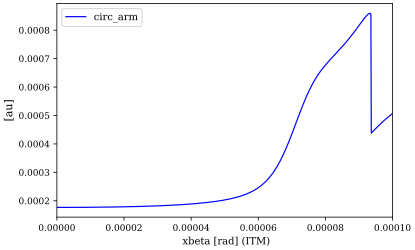

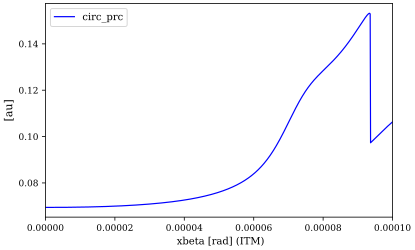

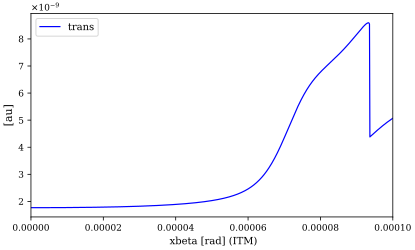

In [3393]:
out.plot(['circ_arm'])
out.plot(['circ_prc'])
out.plot(['trans'])

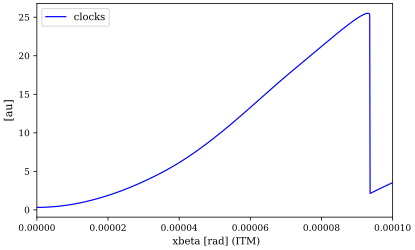

In [3394]:
out.plot(['clocks'])

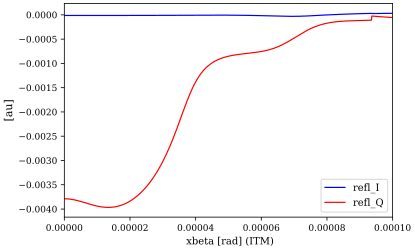

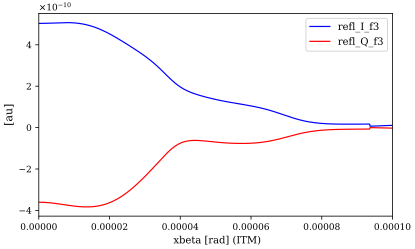

In [3395]:
out.plot(['refl_Q','refl_I'])
out.plot(['refl_I_f3','refl_Q_f3'])

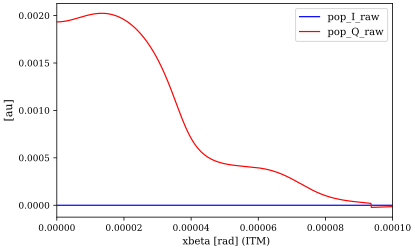

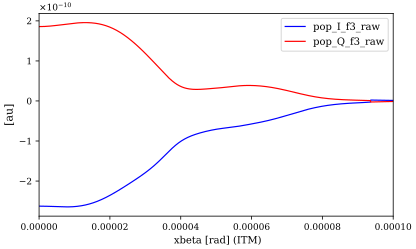

In [3396]:
out.plot(['pop_I_raw','pop_Q_raw'])
out.plot(['pop_I_f3_raw','pop_Q_f3_raw'])

In [3397]:
#out.stdout

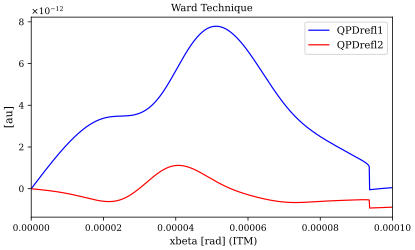

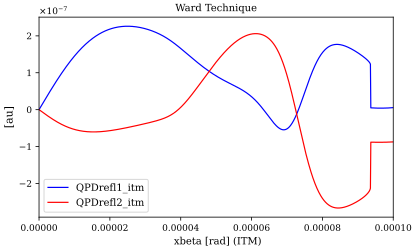

In [3398]:
out.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique')
out.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique')